📦 Dimensiunea setului: (35096, 2)
📊 Logistic Regression
Accuracy: 0.9425925925925925
                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        14
            CPUs       0.98      1.00      0.99       726
 Digital Cameras       1.00      0.99      0.99       535
     Dishwashers       0.90      0.95      0.93       684
        Freezers       0.99      0.86      0.92       422
 Fridge Freezers       0.92      0.92      0.92      1087
         Fridges       0.85      0.90      0.87       702
      Microwaves       0.98      0.95      0.97       464
    Mobile Phone       0.00      0.00      0.00        17
   Mobile Phones       0.95      0.98      0.97       795
             TVs       0.97      0.99      0.98       724
Washing Machines       0.95      0.95      0.95       821
          fridge       0.00      0.00      0.00        29

        accuracy                           0.94      7020
       macro avg       0.73      0.73      

c:\Users\Marina\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Marina\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Marina\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

🌲 Random Forest
Accuracy: 0.9441595441595442
                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        14
            CPUs       0.98      0.99      0.99       726
 Digital Cameras       1.00      0.99      1.00       535
     Dishwashers       0.89      0.96      0.92       684
        Freezers       0.95      0.88      0.91       422
 Fridge Freezers       0.94      0.92      0.93      1087
         Fridges       0.87      0.89      0.88       702
      Microwaves       0.98      0.96      0.97       464
    Mobile Phone       0.00      0.00      0.00        17
   Mobile Phones       0.97      0.98      0.97       795
             TVs       0.95      0.99      0.97       724
Washing Machines       0.94      0.96      0.95       821
          fridge       0.00      0.00      0.00        29

        accuracy                           0.94      7020
       macro avg       0.73      0.73      0.73      7020
    weighted avg       0.

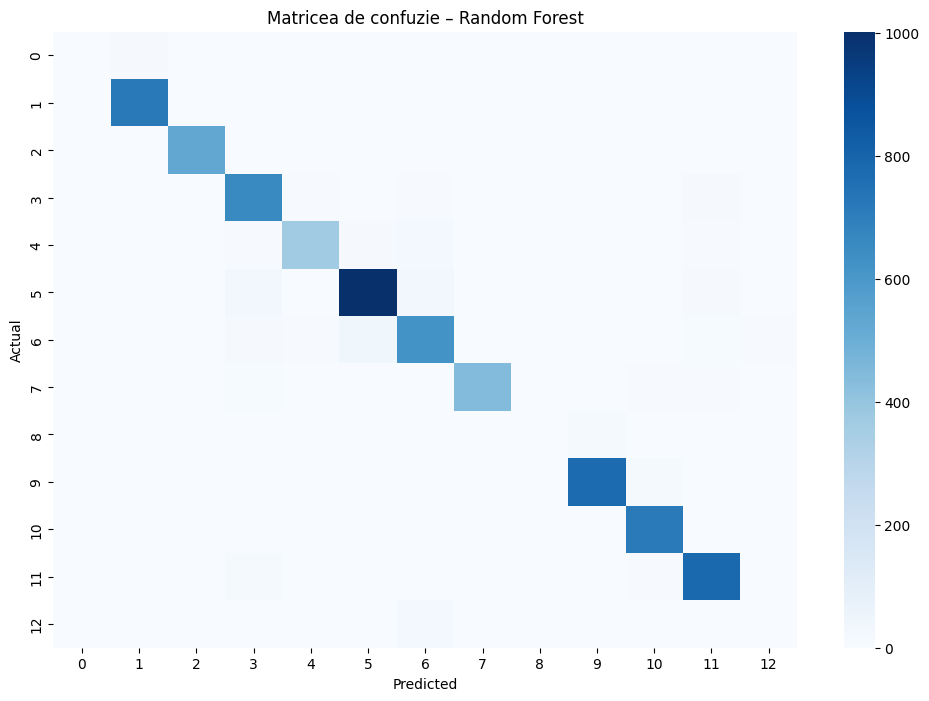

✅ Modelul Random Forest a fost salvat în: ../models/model.pkl


In [3]:
# 1. Importarea bibliotecilor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# 2. Încărcarea setului de date
df = pd.read_csv('../data/products_features.csv')

# 🔧 Eliminare rânduri cu valori lipsă în coloanele esențiale
df = df[['Clean Title', 'Category Label']].dropna()
df['Clean Title'] = df['Clean Title'].fillna('')  # extra siguranță

print("📦 Dimensiunea setului:", df.shape)

# 3. Pregătirea datelor
X = df['Clean Title']
y = df['Category Label']



# 4. Împărțirea în seturi de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Vectorizare + Logistic Regression
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

# 6. Evaluare Logistic Regression
print("📊 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 7. Vectorizare + Random Forest
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

# 8. Evaluare Random Forest
print("🌲 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 9. Matrice de confuzie pentru modelul ales
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=False, cmap='Blues')
plt.title('Matricea de confuzie – Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. Salvarea modelului final
with open('../models/model.pkl', 'wb') as f:
    pickle.dump(pipeline_rf, f)

print("✅ Modelul Random Forest a fost salvat în: ../models/model.pkl")
